# Tema 7: Kontinuerlig modellering og simuleringer

### Aktiviteter
#### 1. Puslespill
[Difflikningsintegrasjonsfunksjon](http://parsons.problemsolving.io/puzzle/67c135760a964287b3dfa83e658cfd00)

#### 2. Feilsøking
Programmet nedenfor skal regne ut konsentrasjonen til produkter og reaktanter i reaksjonen:

$$ H_2 (g) + I_2 (g) \rightleftharpoons 2HI (g)$$

gitt følgende ratelov:

$$\frac{d[HI]}{dt} = k_r[H_2][I_2]$$

men programmet fungerer ikke som det skal. Rett opp feilene.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Initialbetingelser
H = 1.0        # Konsentrasjon av hydrogengass i mol/L    
I = 1.0        # Konsentrasjon av jodgass i mol/L
HI = 0         # Konsentrasjon av hydrogenjodid i mol/L
k = 4.84E-2      # Ratekonstant ved ca. 450 grader C

#Tidssteg
dt = 1E-3
tid = 100 # Tid i sekunder
N = int(tid/dt) + 1 # Antall iterasjoner

#Arrayer
t = np.zeros(N)    # Tid i sekunder
H = np.zeros(N)    # Konsentrasjon av H2
I = np.zeros(N)    # Konsentrasjon av I2
HI = np.zeros(N)   # Konsentrasjon av HI

H[0] = H
I[0] = I
HI[0] = HI

# Eulers metode
for i in range(N-1):
    HIder = k*H*I
    Hder = -0.5*HIder
    Ider = Hder
    HI[i+1] = HI[i] + HIder[i]*dt
    H[i+1] = H[i] + Hder[i]*dt
    I[i+1] = I[i] + Ider[i]*dt
    t[i+1] = t[i] + dt

plt.title('Reaksjonskinetikk for dannelse av HI')
plt.xlabel('tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.plot(t, HI, label = 'HI')
plt.plot(t, H, label = 'H$_2$ og I$_2$')
plt.legend(loc=0)           # Merkelapp med bestemt posisjon i vinduet
plt.show()

## Newtons 2. lov og bevegelse

In [11]:
# Fysiske størrelser og konstanter
g = 9.8
m = 30
k = 0
dt = 1E-6

# Startbetingelser
s = 15
v = 0
t = 0

while s > 0:
    a = -g + k/m*v**2
    v = v + a*dt
    s = s + v*dt
    t = t + dt

print(t)

1.749635999946248


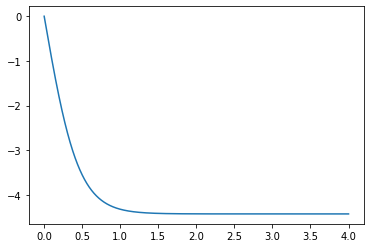

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Fysiske størrelser og konstanter
g = 9.8
m = 30
k = 0.5

# Startbetingelser
s0 = 15
v0 = 0

# Tidssteg
dt = 1E-3
tid = 4
n = int(tid/dt)

# Array
t = np.zeros(n+1)
s = np.zeros(n+1)
v = np.zeros(n+1)
a = np.zeros(n+1)

# Initialisering
s[0] = s0
v[0] = v0

# Eulers metode
for i in range(n):
    a[i] = -g + k*v[i]**2
    v[i+1] = v[i] + a[i]*dt
    s[i+1] = s[i] + v[i]*dt
    t[i+1] = t[i] + dt

plt.plot(t,v)
plt.show()

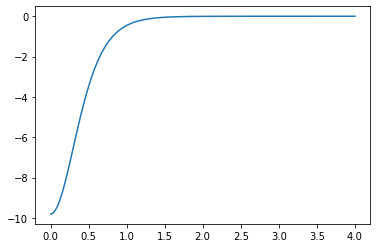

In [23]:
plt.plot(t[0:i],a[0:i])
plt.show()

### Eksempel: Vibrasjonsmodeller

Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_0)$$

der _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut.

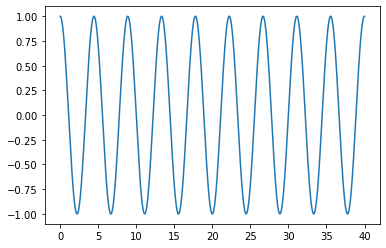

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanter og variabler
m = 1    # Masse i kg
k = 2    # Fjærkonstant
x_eq = 0 # Likevektsposisjon i m
v0 = 0   # Startfart i m/s
x0 = 1   # Startposisjon i m

# Tidssteg
dt = 1E-6
tid = 40        # Tid i s
N = int(tid/dt) # Intervaller

# Initialisering
v = np.zeros(N+1)
x = np.zeros(N+1)
t = np.zeros(N+1)

v[0] = v0
x[0] = x0

# Integrasjonsløkke
for i in range(N):
    a = -k/m*(x[i]-x_eq)
    # Eulers metode
    v[i+1] = v[i] + a*dt
    x[i+1] = x[i] + v[i]*dt
    t[i+1] = t[i] + dt
    
plt.plot(t,x)
plt.show()

## Enzymkinetikk

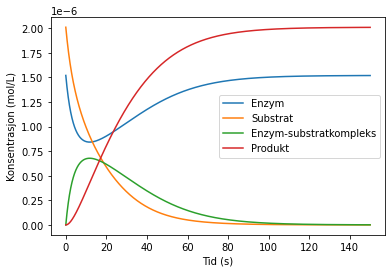

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Konstanter og variabler
k1 = 7.32E4      
k1_back = 1.22E-2
k2 = 7.01E-2

E0 = 1.52E-6
S0 = 2.01E-6

# Tidssteg
tid = 150 # Tid i sekunder
dt = 1E-3 # Tidssteg i s
N = int(tid/dt) # Antall intervaller

# Initialisering
S = np.zeros(N+1)
E = np.zeros(N+1)
ES = np.zeros(N+1)
P = np.zeros(N+1)
t = np.zeros(N+1)

E[0] = E0
S[0] = S0

# Integrasjonsløkke
for i in range(N):
    # Ratelovene
    dSdt = -k1*E[i]*S[i] + k1_back*ES[i]
    dEdt = -k1*E[i]*S[i] + k1_back*ES[i] + k2*ES[i]
    dESdt = k1*E[i]*S[i] - k1_back*ES[i] - k2*ES[i]
    dPdt = k2*ES[i]
    # Eulers metode
    S[i+1] = S[i] + dSdt*dt
    E[i+1] = E[i] + dEdt*dt
    ES[i+1] = ES[i] + dESdt*dt
    P[i+1] = P[i] + dPdt*dt
    t[i+1] = t[i] + dt
    
plt.plot(t,E,label='Enzym')
plt.plot(t,S,label='Substrat')
plt.plot(t,ES,label='Enzym-substratkompleks')
plt.plot(t,P,label='Produkt')
plt.legend()
plt.xlabel('Tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.show()